In [199]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms

To extract neighbors a mask is created that will be moved over the image to create new features.

In [200]:
def create_circular_mask(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    mask[radius][radius] = 0
    kernel[mask] = 1
    return kernel

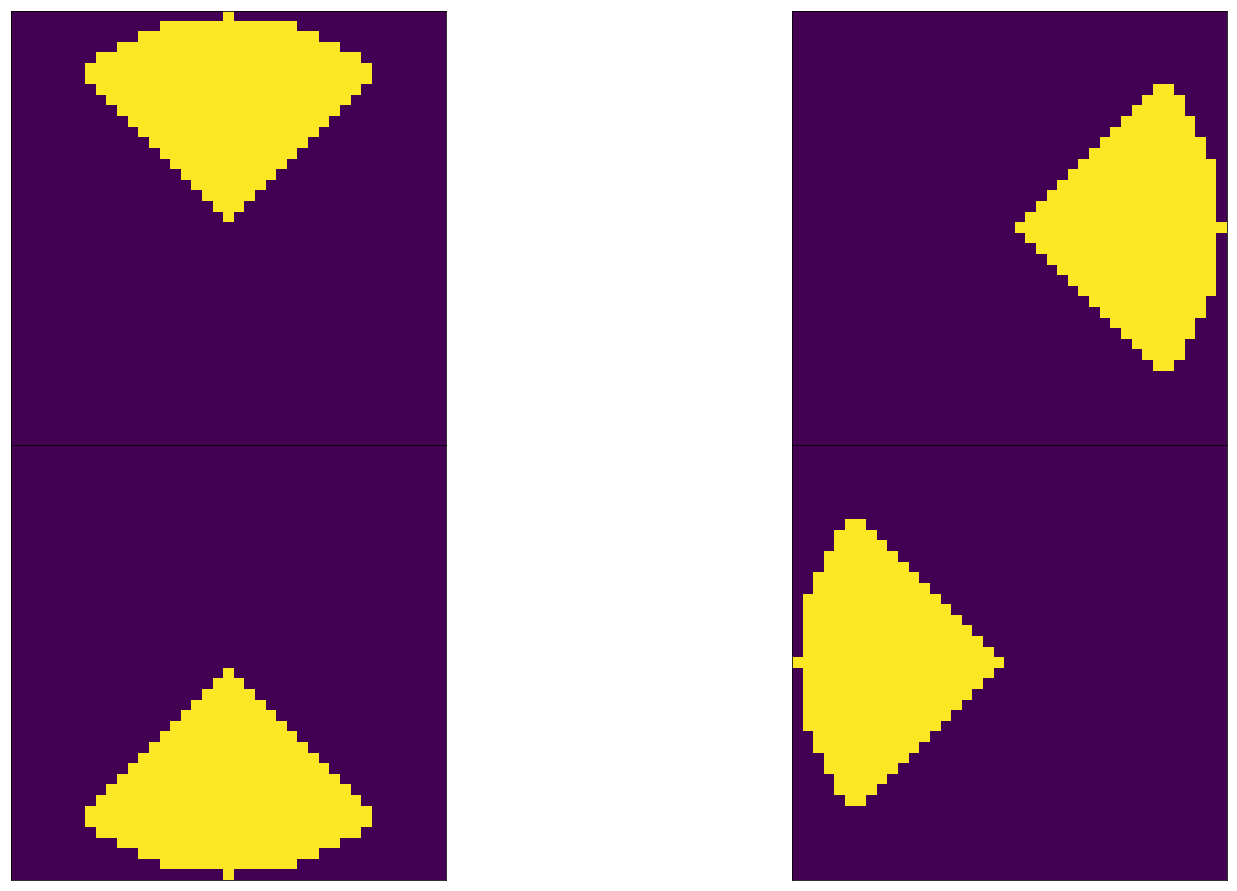

In [201]:
def create_conic_mask(radius, direction):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    if direction == 0:
        mask = (x > y) & (x < abs(y)) & (x**2 + y**2 <= radius**2)
    elif direction == 1:
        mask = (x > abs(y)) & (x**2 + y**2 <= radius**2)
    elif direction == 2:
        mask = (abs(x) < y) & (x**2 + y**2 <= radius**2)
    elif direction == 3:
        mask = (abs(x) > abs(y)) & (x < abs(y)) & (x**2 + y**2 <= radius**2)    
    kernel[mask] = 1
    return kernel

plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,2,i+1) for i in range(4)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].imshow(create_conic_mask(20, 0))
ax[1].imshow(create_conic_mask(20, 1))
ax[2].imshow(create_conic_mask(20, 2))
ax[3].imshow(create_conic_mask(20, 3))

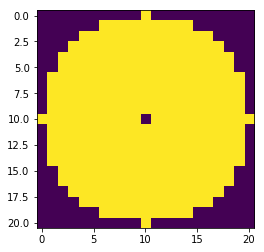

In [202]:
#Example of mask
plt.imshow(create_circular_mask(10))

0.4569699
(array([258], dtype=int64), array([985], dtype=int64))
0.46985248
(array([260], dtype=int64), array([984], dtype=int64))
0.4764132
(array([713], dtype=int64), array([135], dtype=int64))


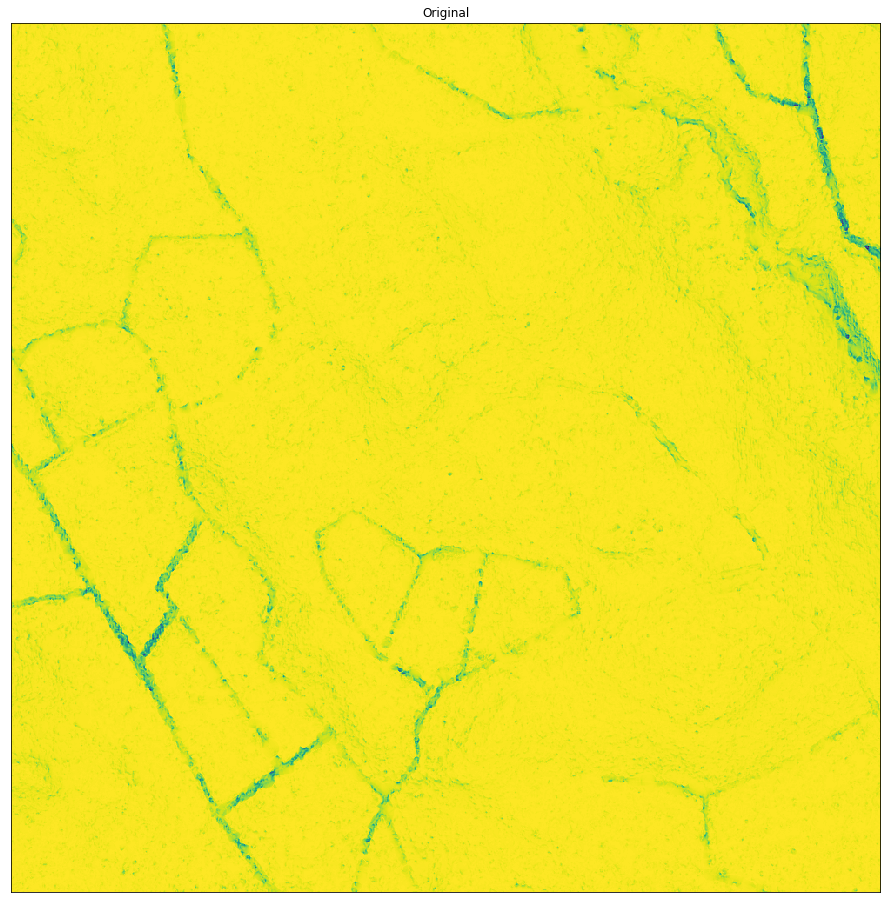

In [203]:
im = Image.open("croppedImage_skyview1000x1000.tif")
arr = np.asarray(im)
mask = create_circular_mask(2)

for row in arr:
    for pixel in row:
        if pixel < 0.5:
            print(pixel)
            print(np.where(arr == pixel))

plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Original")
ax[0].imshow(arr)

#ax[1].title.set_text("Median")
#ax[1].imshow(gf(arr,np.nanmedian,footprint=mask))

#ax[2].title.set_text("Mean")
#ax[2].imshow(gf(arr,np.nanmean,footprint=mask))

#ax[3].title.set_text("Standard deviation")
#ax[3].imshow(gf(arr,np.nanstd,footprint=mask))

#ax[4].title.set_text("Maximum")
#ax[4].imshow(gf(arr,ms.tmax,footprint=mask))

#ax[5].title.set_text("Skew")
#ax[5].imshow(gf(arr,ms.skew,footprint=mask))

#ax[6].title.set_text("variance")
#ax[6].imshow(gf(arr,ms.trimmed_var,footprint=mask))

#ax[7].title.set_text("Standard error of the mean")
#ax[7].imshow(gf(arr,ms.sem,footprint=mask))